In [15]:
from matplotlib.pyplot import imshow 
import numpy as np

# # input image dimensions
# img_rows, img_cols = 28, 28

# # Uncomment the following lines if you have keras installed. Otherwise you can 
# # use the file I uploaded: mnist.npz
# import keras
# from keras.datasets import mnist

# # the data, split between train and test sets
# (x_train, y_train), (x_test, y_test) = mnist.load_data()

# if K.image_data_format() == 'channels_first':
#     x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
#     x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
#     input_shape = (img_rows, img_cols)
# else:
#     x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols)
#     x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols)
#     input_shape = (img_rows, img_cols)

# x_train = x_train.astype('float32')
# x_test = x_test.astype('float32')
# x_train /= 255
# x_test /= 255

# np.savez_compressed('mnist.npz', x_train, y_train, x_test, y_test)

arc = np.load('mnist.npz')

x_train = arc['arr_0']
y_train = arc['arr_1']
x_test  = arc['arr_2']
y_test  = arc['arr_3']

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


# Assigment 1
- d_infty $$ d_{\infty}(a,b) := \max_{i,j} |b_{ij}-a_{ij}|$$

In [29]:
def d_infty(a,b):
    return np.max(abs(b-a))

def d_intfy_opt(a,b):
    return np.max(abs(b-a))

In [30]:
%%timeit

d_infty(x_train[0], x_train[1])

7.78 µs ± 77.2 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


- d_one $$ d_1(a,b) := \sum_{i,j} |b_{ij}-a_{ij}|$$

In [31]:
def d_one(a,b):
    return np.sum(abs(b-a))

def d_one_opt(a,b):
    return np.sum(abs(b-a))

In [32]:
%%timeit

d_one(x_train[0], x_train[1])

8.74 µs ± 264 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


- d_two $$ d_2(a,b) := \sqrt{\sum_{i,j} |b_{ij}-a_{ij}|^2} =\color{blue} \sqrt{\sum_{i,j}(b_{ij}-a_{ij})^2}$$

In [14]:
def d_two(a,b):
    return np.sqrt(np.sum((b-a)**2))

In [35]:
%%timeit

d_two(x_train[0], x_train[1])

8.89 µs ± 229 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


# Assigment 2
Write a function that, given a number `N`, and a distance function `dist`, computes the distance matrix D of shape `(N,N)` between the first `N` entries of `x_train`:

```
D[i,j] = dist(x_train[i], x_train[j])
```

performing the **minimum** number of operations (i.e., avoid computing a distance if it has already been computed before, i.e., keep in mind that dist(a,b) = dist(b,a)).

In [16]:
def n_dist(N, dist):
    D = np.zeros((N,N))
    for i in range(N):
        for j in range(i+1,N):
            D[i][j] = dist(x_train[i],x_train[j])
            D[j][i] = D[i][j]
    return D

In [147]:
%%timeit

D = n_dist(50, d_two)

13.6 ms ± 657 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


# Assignment 3

Compute and plot the three distance matrices

- Dinfty
- D1
- D2

for the first 100 images of the training set, using the function `imshow` applied to the three matrices

In [148]:
%%time

Dinfty = n_dist(100, d_infty)
D1 = n_dist(100, d_one)
D2 = n_dist(100, d_two)

CPU times: total: 78.1 ms
Wall time: 207 ms


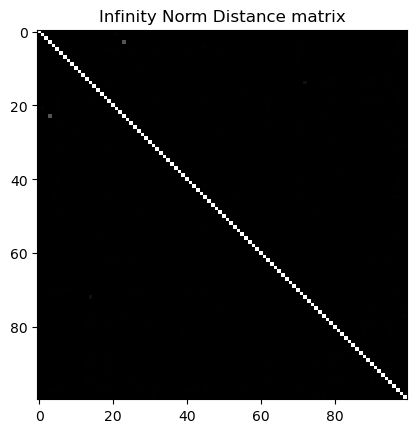

In [49]:
plt.imshow(Dinfty, cmap='gray_r')
_ = plt.title('Infinity Norm Distance matrix')

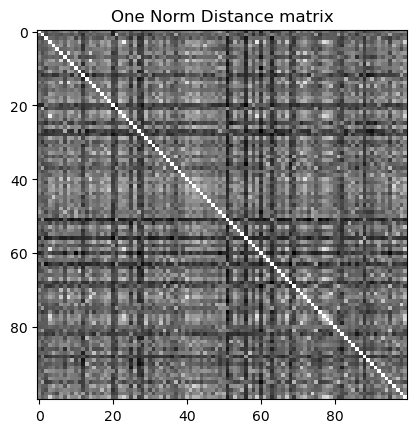

In [50]:
plt.imshow(D1, cmap='gray_r')
_ = plt.title('One Norm Distance matrix')

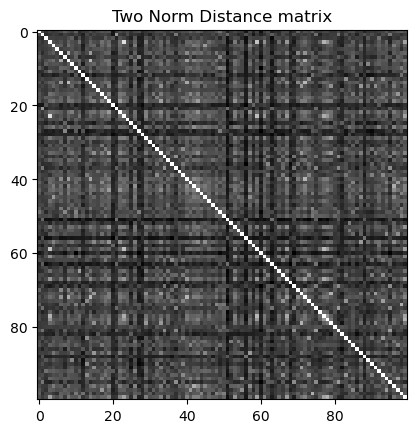

In [149]:
plt.imshow(D2, cmap='gray_r')
_ = plt.title('Two Norm Distance matrix')

# Assignment 4

Using only a distance matrix, apply the algorithm described above and compute the efficency of the algorithm, i.e., write a function that:

Given a distance matrix with shape `(N,N)`, constructed on the first `N` samples of the `x_train` set, count the number of failures of the **leave one out** strategy, i.e., 

- set `error_counter` to zero

- for every line `i` of the matrix:

    - find the index `j` (different from `i`) for which `D[i,k] >= D[i,j]` for all `k` different from `i` and `j`.

    - if `y_train[j]` is different from `y_train[i]`, increment by one `error_counter`

- return the error: error_counter/N

- apply the function above to the 3 different distance matrices you computed before

In [52]:
def effncy(D):
    N = D.shape[0]
    error_counter = 0
    for i in range(N):
        min_d_index =(i+1)%N
        for k in range(N):
            if k != i and D[i, min_d_index] > D[i, k]:
                min_d_index = k
        if y_train[min_d_index] != y_train[i]:
            error_counter += 1
    return error_counter/N

def effncy2(D):
    N = D.shape[0]
    error_counter = 0
    for i in range(N):
        m1 = np.min(D[i, 0:i], initial=D[i,(i+1)%N])
        m2 = np.min(D[i, i+1:N], initial=D[i,(i+1)%N])
        min_d = np.where(D[i] == m1)[0][0] if m1 < m2 else np.where(D[i] == m2)[0][0]
        if y_train[min_d] != y_train[i]:
            error_counter += 1
    return error_counter/N

In [53]:
%%timeit

effncy(D2)

4.07 ms ± 615 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [54]:
%%timeit

effncy2(D2)

1.71 ms ± 168 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [150]:
print("Efficency of Infinity Norm Distance is: "+str(effncy2(Dinfty)))

print("Efficency of One-Norm Distance is:      "+str(effncy2(D1)))

print("Efficency of Two-Norm Distance is:      "+str(effncy2(D2)))

Efficency of Infinity Norm Distance is: 0.58
Efficency of One-Norm Distance is:      0.17
Efficency of Two-Norm Distance is:      0.17


# Assignment 5

Run the algorithm implemented above for N=100,200,400,800,1600 on the three different distances, and plot the three error rate as a function of N (i.e., compute the distance matrix, and compute the efficiency associated to the distance matrix).

You should get an error like:
```
[[ 0.58      0.17      0.17    ]
 [ 0.52      0.145     0.135   ]
 [ 0.4425    0.15      0.135   ]
 [ 0.4       0.145     0.12875 ]
 [ 0.369375  0.1025    0.09375 ]]
```
where each column represents a different norm.

**In the next assignments, optional points are given if you manage to make the algorithm run faster, by pre-computing everything you can precompute in advance**

In [151]:
%%time

N = [100, 200, 400, 800, 1600]
funcs = [d_infty, d_one, d_two]

DD = np.array([[effncy2(n_dist(i,f)) for f in funcs] for i in N])

CPU times: total: 28.9 s
Wall time: 49.7 s


In [152]:
DD

array([[0.58    , 0.17    , 0.17    ],
       [0.52    , 0.145   , 0.135   ],
       [0.4425  , 0.15    , 0.135   ],
       [0.4     , 0.145   , 0.12875 ],
       [0.369375, 0.1025  , 0.09375 ]])

# Assignment 6

In principle, it should be possible to decrease the error by using a better norm. From the table above, it is clear that the L2 distance works better than the L1 distance, which works better than the Linfty distance.

However, *none of these distances exploit the fact that the image is a two-dimensional object*, and that there is information also in the **neighboring** information of the pixels. 

One way to exploit this, is to interpret the image as a continuous function with values between zero and one, defined on a square domain `\Omega=[0,27]x[0,27]`.

$$ f: \Omega \to [0,1] $$

- Implement a function that computes an approximation of the $H^1$ norm distance on the renormalized images. Given two images $f_1$ and $f_2$
    - Compute $$a = \frac{f_1}{\int_\Omega f_1}$$, $$b=\frac{f_2}{\int_\Omega f_2}$$
    - Define the $H^1$ distance as
    $$
    d_{H^1}(f_1,f_2) := \sqrt{\int_\Omega |\nabla(a-b)|^2+ (a-b)^2}
    $$
    using the algorithm you prefer (or the library you prefer) to compute the gradients and the integrals. Notice that $\nabla f = (\partial f/\partial x, \partial f/\partial y)$ is a vector valued function, and $|\nabla g|^2 := (\partial g/\partial x)^2 + (\partial g/\partial y)^2$

- Compute the distance matrix and the efficiency for this distance for N=100,200,400,800,1600

In [58]:
from scipy.integrate import nquad

In [124]:
def normalize(f):
    options = {'limit':64}
    fp = nquad(lambda r,c: f[int(r)][int(c)], [[0, 27], [0, 27]], opts=[options,options])[0]
    return f / fp

### Integral study: finding balance between execution time and error.
I tweaked the `limit` parameter. Test values are `50`, `100`, `200` and the powers of `2` from `6` to `10` inclusive. `50` is default value.  
I settled for `64` in normalization and `25` in the distance metric. The values provide an acceptable error while computing in resonable time. They are different for the two functions because they use the integral in different quantities.  

Note, after value `475` the error is not bounded anymore by the parameter `limit`.

Documentation on `limit`:  
**`limit`: float or int, optional**
An upper bound on the number of subintervals used in the adaptive algorithm.

In [60]:
import time

def tim(i, f):
    options2 = {'limit':i}
    t_start = time.perf_counter()
    fp = nquad(lambda r,c: f[int(r)][int(c)], [[0, 27], [0, 27]], opts=[options2,options2])[1]
    t_end = time.perf_counter()
    return(fp, t_end - t_start)

l = [2**i for i in range(6,11)]
l.append(50)
l.append(100)
l.append(200)
l.sort()

def study_normalize(f):
    return [tim(i, f) for i in l]

data = study_normalize(x_train[0])

c:\Users\gcmil\anaconda3\Lib\site-packages\scipy\integrate\_quadpack_py.py:1225: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
c:\Users\gcmil\anaconda3\Lib\site-packages\scipy\integrate\_quadpack_py.py:1225: IntegrationWarning: The maximum number of subdivisions (64) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  

In [61]:
data

[(0.291190966585825, 2.3887522000004537),
 (0.1070355661754121, 3.550902099996165),
 (0.042109295004147965, 7.833107200000086),
 (0.03576114319763235, 12.430354700001772),
 (0.007656080021916978, 28.03524080000352),
 (7.788042364609282e-05, 36.40454309999768),
 (4.4280156430431816e-07, 58.75726980000036),
 (4.4280156430431816e-07, 58.777982699997665)]

In [63]:
times = []
error = []
for d in data:
    error.append(d[0])
    times.append(d[1])

log_error = np.log(error)

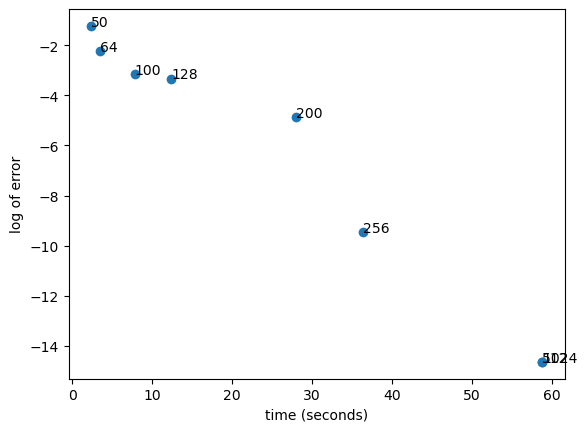

In [69]:
fig, ax = plt.subplots()
ax.scatter(times, log_error)
plt.ylabel('log of error')
plt.xlabel('time (seconds)')

for i, p in enumerate(l):
    ax.annotate(p, (times[i], log_error[i]))

### Precomutation

In [70]:
%%time

print(normalize(x_train[0]))

c:\Users\gcmil\anaconda3\Lib\site-packages\scipy\integrate\_quadpack_py.py:1225: IntegrationWarning: The maximum number of subdivisions (64) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.

In [125]:
def d_h1(a,b):
    """parameters a and b assumed to be already normalized"""
    gr = np.gradient(a-b)
    f = gr[0]**2 + gr[1]**2 + (a-b)**2
    options = {'limit':25}
    return np.sqrt(nquad(lambda r,c: f[int(r)][int(c)], [[0, 27], [0, 27]],opts=[options,options])[0])

In [118]:
%%time

d_h1(x_train[0], x_train[1])

c:\Users\gcmil\anaconda3\Lib\site-packages\scipy\integrate\_quadpack_py.py:1225: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


CPU times: total: 3.64 s
Wall time: 6.45 s


12.018596601730277

In [81]:
# pre-compute normalization of first 1600 images in x_train
x_trian_norm = np.array([normalize(x_train[i]) for i in range(1600)])

c:\Users\gcmil\anaconda3\Lib\site-packages\scipy\integrate\_quadpack_py.py:1225: IntegrationWarning: The maximum number of subdivisions (64) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


In [106]:
def new_n_dist(N, dist):
    """uses the normalized images"""
    D = np.zeros((N,N))
    for i in range(N):
        for j in range(i+1,N):
            D[i][j] = dist(x_trian_norm[i],x_trian_norm[j])
            D[j][i] = D[i][j]
    return D

### Computation
Unfortunately my PC was able to only compute the first two matrices

In [133]:
%%time
DD100 = new_n_dist(100,d_h1)
E = [effncy2(DD100)]

c:\Users\gcmil\anaconda3\Lib\site-packages\scipy\integrate\_quadpack_py.py:1225: IntegrationWarning: The maximum number of subdivisions (25) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


CPU times: total: 30min 28s
Wall time: 39min 21s


In [153]:
%%time
DD200 = new_n_dist(200,d_h1)
E.append(effncy2(DD200))

c:\Users\gcmil\anaconda3\Lib\site-packages\scipy\integrate\_quadpack_py.py:1225: IntegrationWarning: The maximum number of subdivisions (25) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


CPU times: total: 1h 48min 28s
Wall time: 2h 29min 27s


In [ ]:
%%time
DD400 = new_n_dist(400,d_h1)
E.append(effncy2(DD400))

# estimated time: 11 hours >.<

In [154]:
E

[0.23, 0.18]

Efficency worse than l1 or l2 norm

In [155]:
# export data
np.savez('x_train_norm', x_trian_norm)
np.savez('matrices_diff', DD100, DD200)

# Assigment 7

Use the `BallTree` algorithm (https://en.wikipedia.org/wiki/Ball_tree), from the `sklearn` package, and construct a tree data structure **that uses a distance from the steps defined above**.

For N in `[3200, 6400]` and for each distance defined above

- Build a tree using the first N entries of the training set `x_train`
- Construct a function that tests the efficiency on all the entries of the test set `x_test`:
    - for any image in `x_test`, call it `x_test[i]`, query the tree for the nearest neighbor (call it `k`), and assign as predicted digit the digit of the `x_train[k]` image, i.e., `y_train[k]`
    - check if `y_train[k]` is equal to the corresponding entry in `y_test[i]`. If not, increment a counter of the error
    - return the efficiency, i.e., `error_counter/len(x_test)`
- Plot, in a single graph, the error of each distance as a function of `N` (including labels, titles, etc.)

- Once you have the tree, experiment with different nearest neighbor algorithms, i.e., instead of taking only one nearest neighbor, take a larger number (a small number of your choice), and instead of returning the single closest digit, return the one with the largest number of occurrences. Plot the same graph you gave before, and see if you gain an improvement. Motivate all choices you have to make to get to the final answer.


**IF YOU DON'T HAVE ENOUGH COMPUTATIONAL POWER, RUN THE EXERCISES ONLY UP TO WHAT IS SUSTAINABLE FOR YOUR PC**

In [171]:
from sklearn.neighbors import BallTree

**Reshape data**, necessary for `BallTree`

In [172]:
# data
x_train_flat = x_train[:6400].reshape(6400, 784)
x_test_flat = x_test.reshape(10000, 784)

In [173]:
# parameters
N = [100, 200, 400, 800, 1600, 3200, 6400]
metrics = ['infinity', 'l1', 'l2']

**Compute ball trees**

In [174]:
# trees
trees = [[BallTree(x_train_flat[:nn], metric=mm) for mm in metrics] for nn in N]

In [175]:
# efficency function
def effncy3(t, m=10000):
    """ t:  ball tree
        m:  size of x_test to consider. default=10000"""
    error_count = 0
    for i in range(m):
        k = t.query(x_test[i].reshape(1,-1), return_distance=False)
        if y_train[k] != y_test[i]:
            error_count += 1
    return error_count/m

**Compute efficency**

In [176]:
%%time
# efficency computation
efficency = [[effncy3(t) for t in trio] for trio in trees]

CPU times: total: 4min 2s
Wall time: 5min 30s


**Plot**  
Efficency increases as N increases

([<matplotlib.axis.XTick at 0x28a96b9bed0>,
 [Text(0, 0, '100'),
  Text(1, 0, '200'),
  Text(2, 0, '400'),
  Text(3, 0, '800'),
  Text(4, 0, '1600'),
  Text(5, 0, '3200'),
  Text(6, 0, '6400')])

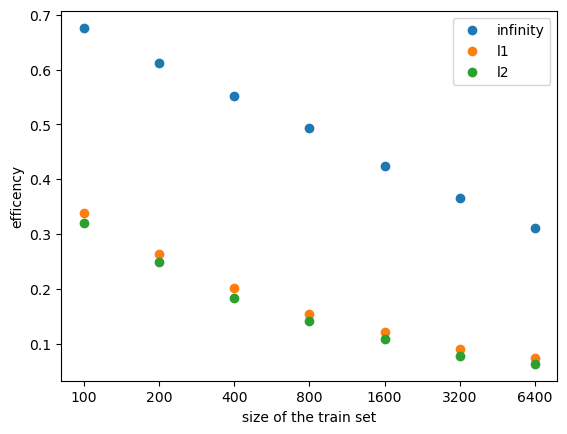

In [177]:
# plot
plt.plot(efficency, 'o')

plt.ylabel('efficency')
plt.xlabel('size of the train set')

plt.legend(metrics)

plt.xticks(ticks=range(len(N)), labels=N)

In [178]:
efficency

[[0.6759, 0.3383, 0.3206],
 [0.6125, 0.2631, 0.249],
 [0.5525, 0.2015, 0.1836],
 [0.4926, 0.154, 0.1406],
 [0.4235, 0.1212, 0.1086],
 [0.3652, 0.0908, 0.0783],
 [0.3115, 0.0745, 0.0631]]

### Expanding the search to multiple neighbours
I consider `k = [2, 3, 4, 5, 10, 50, 100]`

In [179]:
# efficency function
def best_neigh(k):
    return np.argmax(np.bincount([y_train[ks] for ks in k.flatten()]))


def effncy4(t, m=10000, kp=2):
    """ t:  ball tree
        m:  size of x_test to consider. default=10000
        kp: The number of nearest neighbors to return. default=2"""
    error_count = 0
    for i in range(m):
        k = t.query(x_test[i].reshape(1,-1), k=kp, return_distance=False)
        if best_neigh(k) != y_test[i]:
            error_count += 1
    return error_count/m

In [181]:
%%time
# efficecny computation
ks = [2, 3, 4, 5, 10, 50, 100]

k_efficency = [[[effncy4(t, kp=n) for t in trio] for trio in trees] for n in ks]
k_efficency

CPU times: total: 28min 26s
Wall time: 40min 43s


[[[0.7127, 0.3797, 0.3544],
  [0.663, 0.2966, 0.2764],
  [0.6101, 0.2323, 0.2082],
  [0.5519, 0.1771, 0.1595],
  [0.4802, 0.1469, 0.1263],
  [0.4179, 0.1084, 0.0937],
  [0.357, 0.0875, 0.0748]],
 [[0.7231, 0.3733, 0.3524],
  [0.665, 0.3043, 0.2854],
  [0.6082, 0.2287, 0.2092],
  [0.5499, 0.1697, 0.1499],
  [0.473, 0.1287, 0.1125],
  [0.4115, 0.0921, 0.0798],
  [0.3493, 0.0743, 0.063]],
 [[0.7106, 0.3804, 0.3574],
  [0.6494, 0.3063, 0.2837],
  [0.5857, 0.2319, 0.2149],
  [0.5301, 0.1688, 0.1479],
  [0.4547, 0.1342, 0.1132],
  [0.3939, 0.0959, 0.0829],
  [0.3314, 0.0761, 0.0657]],
 [[0.6961, 0.4001, 0.3768],
  [0.6386, 0.3238, 0.3004],
  [0.5752, 0.2382, 0.2229],
  [0.5185, 0.1691, 0.1515],
  [0.4474, 0.1333, 0.1158],
  [0.3874, 0.0958, 0.0799],
  [0.3263, 0.0758, 0.0643]],
 [[0.7308, 0.4531, 0.4251],
  [0.6296, 0.3579, 0.335],
  [0.563, 0.2767, 0.2504],
  [0.5107, 0.1901, 0.1679],
  [0.4454, 0.1439, 0.1262],
  [0.3909, 0.1017, 0.0877],
  [0.3398, 0.0838, 0.0712]],
 [[0.7509, 0.7343, 0.6

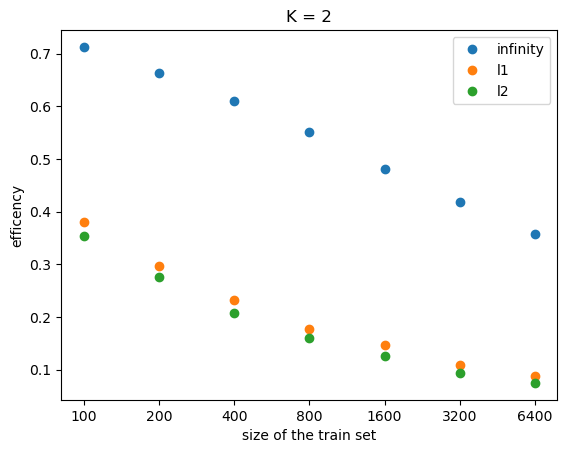

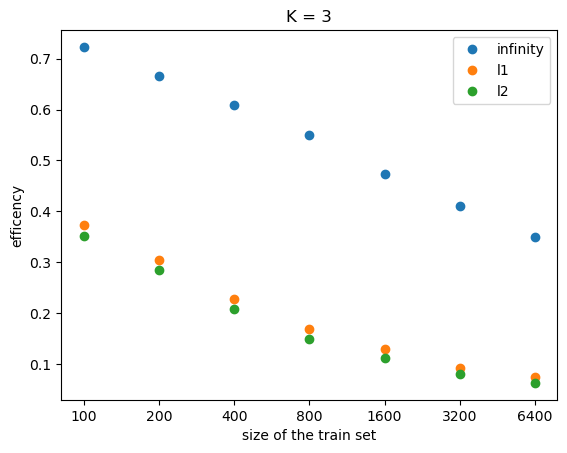

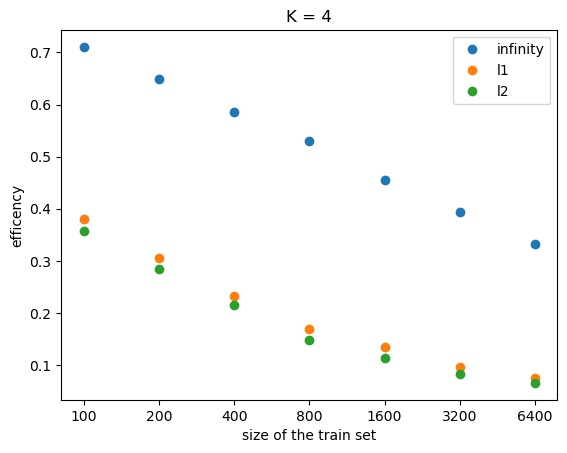

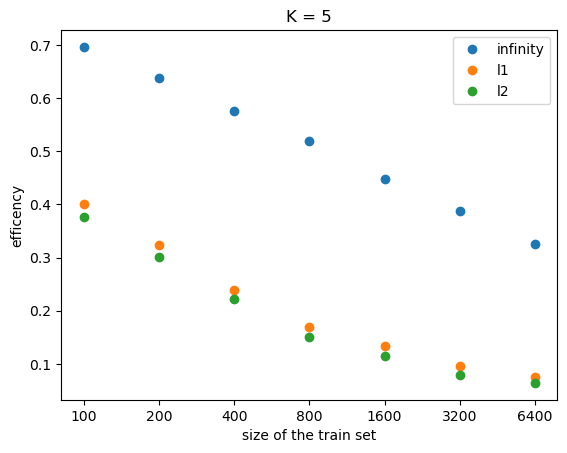

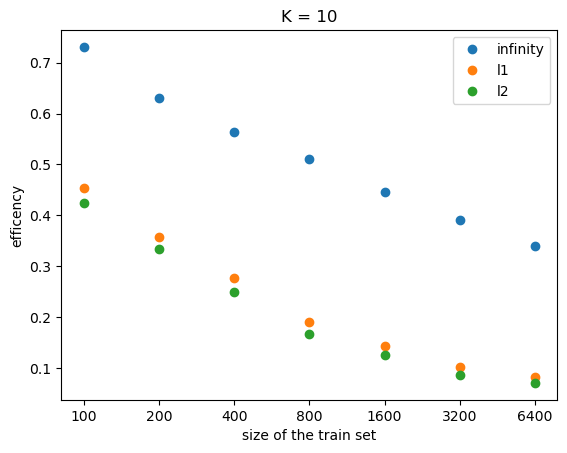

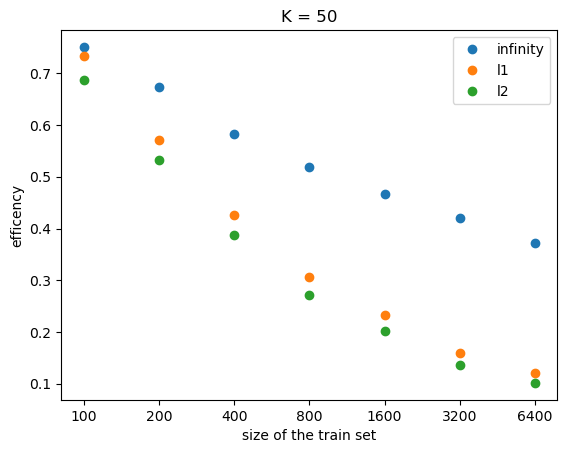

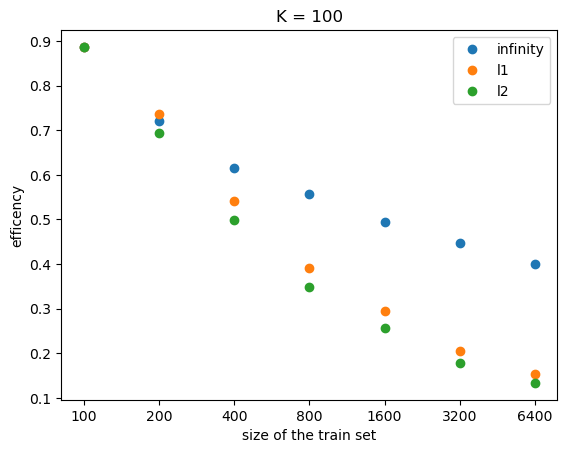

In [182]:
# plot
for k, table in zip(ks, k_efficency):
    plt.figure()
    plt.plot(table, 'o')

    plt.title('K = '+str(k))
    plt.ylabel('efficency')
    plt.xlabel('size of the train set')

    plt.legend(metrics)

    plt.xticks(ticks=range(len(N)), labels=N)
    plt.show()

In [3]:
k_efficency = [[[0.6759, 0.3383, 0.3206],
 [0.6125, 0.2631, 0.249],
 [0.5525, 0.2015, 0.1836],
 [0.4926, 0.154, 0.1406],
 [0.4235, 0.1212, 0.1086],
 [0.3652, 0.0908, 0.0783],
 [0.3115, 0.0745, 0.0631]],
[[0.7127, 0.3797, 0.3544],
  [0.663, 0.2966, 0.2764],
  [0.6101, 0.2323, 0.2082],
  [0.5519, 0.1771, 0.1595],
  [0.4802, 0.1469, 0.1263],
  [0.4179, 0.1084, 0.0937],
  [0.357, 0.0875, 0.0748]],
 [[0.7231, 0.3733, 0.3524],
  [0.665, 0.3043, 0.2854],
  [0.6082, 0.2287, 0.2092],
  [0.5499, 0.1697, 0.1499],
  [0.473, 0.1287, 0.1125],
  [0.4115, 0.0921, 0.0798],
  [0.3493, 0.0743, 0.063]],
 [[0.7106, 0.3804, 0.3574],
  [0.6494, 0.3063, 0.2837],
  [0.5857, 0.2319, 0.2149],
  [0.5301, 0.1688, 0.1479],
  [0.4547, 0.1342, 0.1132],
  [0.3939, 0.0959, 0.0829],
  [0.3314, 0.0761, 0.0657]],
 [[0.6961, 0.4001, 0.3768],
  [0.6386, 0.3238, 0.3004],
  [0.5752, 0.2382, 0.2229],
  [0.5185, 0.1691, 0.1515],
  [0.4474, 0.1333, 0.1158],
  [0.3874, 0.0958, 0.0799],
  [0.3263, 0.0758, 0.0643]],
 [[0.7308, 0.4531, 0.4251],
  [0.6296, 0.3579, 0.335],
  [0.563, 0.2767, 0.2504],
  [0.5107, 0.1901, 0.1679],
  [0.4454, 0.1439, 0.1262],
  [0.3909, 0.1017, 0.0877],
  [0.3398, 0.0838, 0.0712]],
 [[0.7509, 0.7343, 0.6867],
  [0.6734, 0.5713, 0.5315],
  [0.582, 0.4254, 0.3879],
  [0.5185, 0.3063, 0.2709],
  [0.4669, 0.232, 0.2021],
  [0.4198, 0.1595, 0.1363],
  [0.3714, 0.1206, 0.1016]],
 [[0.8865, 0.8865, 0.8865],
  [0.7216, 0.736, 0.6931],
  [0.6153, 0.5405, 0.4979],
  [0.557, 0.3907, 0.3477],
  [0.4941, 0.2954, 0.2579],
  [0.4482, 0.2057, 0.1789],
  [0.3995, 0.1549, 0.1339]]]

8

**How does the efficency change as the number of neighbours considered increases?**  
Efficency for a single tree and single distance metric. I choose the ball tree trained with most images and the best performing metric, thus 6400 images and the l2 norm.

In [6]:
n6400_ml2 = [k_efficency[x][-1][-1] for x in range(len(k_efficency))]
n6400_ml2

[0.0631, 0.0748, 0.063, 0.0657, 0.0643, 0.0712, 0.1016, 0.1339]

Text(0.5, 0, 'neighbors considered')

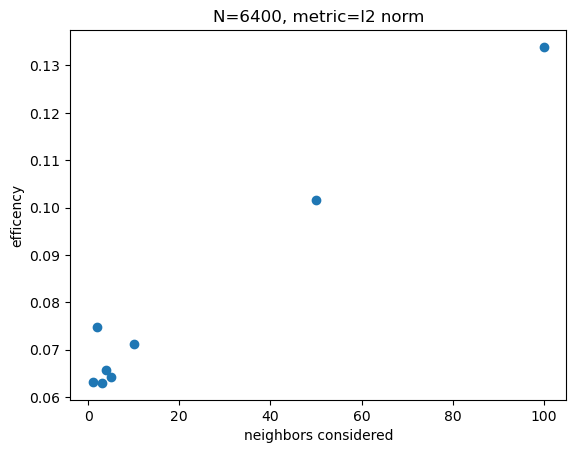

In [12]:
import matplotlib.pyplot as plt
plt.plot([1, 2, 3, 4, 5, 10, 50, 100], n6400_ml2, 'o')

plt.title('N=6400, metric=l2 norm')
plt.ylabel('efficency')
plt.xlabel('neighbors considered')

Better look at `k`-values between 1 and 10.

Text(0.5, 0, 'neighbors considered')

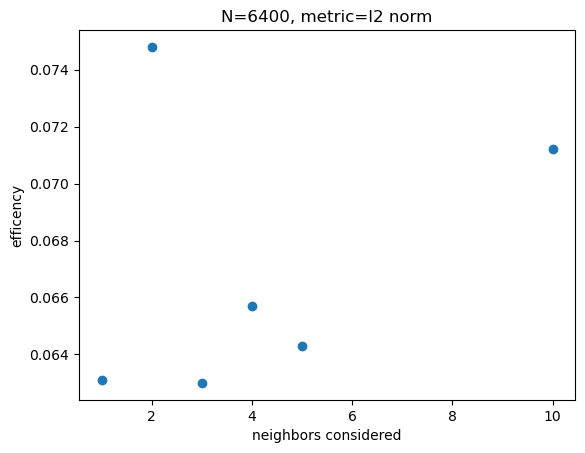

In [13]:
plt.plot([1, 2, 3, 4, 5, 10], n6400_ml2[:-2], 'o')

plt.title('N=6400, metric=l2 norm')
plt.ylabel('efficency')
plt.xlabel('neighbors considered')